<a href="https://colab.research.google.com/github/siddahant/DESOPT/blob/Second/converges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
Name: Siddahant Jain
Converges Problem
```



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fun= lambda x: (2-2*x[0]-3*x[1])**2 + (x[0])**2 + (x[1]-1)**2
def g(x):
  return np.array([(10*x[0]+12*x[1]-8), (12*x[0]+20*x[1]-14)])

H = np.array([[10,12],[12,20]])

In [ ]:
def linesearch(x):
    a = 1
    t = 0.7
    d = -1 * g(x)
    def pi(a, x):
      return fun(x) - a * t * np.matmul(np.transpose(g(x)), d)
    while pi(a, x) < fun(x + a * d):
      a = 0.5 * a
    return a

def gradient(fun, g, H, x0, max_iter,p=True):
  x=x0
  iter=0
  grad_norm= np.linalg.norm(g(x))
  grad_norm_history =[grad_norm]
  path=[x0]
  while grad_norm> 1e-06 and iter<=max_iter:
    a=linesearch(x)
    x = x - a*(g(x))
    grad_norm=np.linalg.norm(g(x))
    path.append(x)
    grad_norm_history.append(grad_norm)
    iter +=1
    if max_iter==iter:
        print(f'Number of iterations exceeded, not converged to given thershold\ncurrent error value is {grad_norm}')
        return x,grad_norm_history,path,iter 
  error_history=[abs(fun(path[i])-fun([-1/7,11/14])) for i in range(len(path))]
  x1 = 1-(2*x[0]+3*x[1]) 
  x=np.insert(x,0,x1)
  if p==True:
    print(f'converged\nnumber of iterations: {iter} \nx1 = {x[0]}\nx2 = {x[1]}\nx3 = {x[2]}')
  return x,error_history,path,iter 

def Newton(fun, g, H, x0, max_iter,p=True):
  x=x0
  grad_norm = np.linalg.norm(g(x))
  grad_norm_history =[grad_norm]
  path=[x0]
  iter=0
  while grad_norm >= 1e-06 and iter<=max_iter:
  #     x = x - a * grad(x)
      x = x - np.matmul(np.linalg.inv(H), g(x))
      grad_norm = np.linalg.norm(g(x))
      grad_norm_history.append(grad_norm)
      path.append(x)
      iter +=1
      if max_iter==iter:
         print(f'Number of iterations exceeded, not converged to given thershold\ncurrent error value is {grad_norm}')
         return x,grad_norm_history,path,iter 
  error_history=[abs(fun(path[i])-fun([-1/7,11/14])) for i in range(len(path))]
  x1 = 1-(2*x[0]+3*x[1])
  x=np.insert(x,0,x1)
  if p==True:
    print(f'converged\nnumber of iterations: {iter} \nx1 = {x[0]}\nx2 = {x[1]}\nx3 = {x[2]}')
  return x,error_history,path,iter 
      

In [254]:

def results (fun, g, h, x0, method,max_iter):

  if (method !='N') and (method !='G') :
    return print(f'[error]: Invalid Method -> {method}\nonly G -> Gradinet and N -> Newton present')

  f_conv, ax_conv = plt.subplots()
  ax_conv.set_yscale("log")
  ax_conv.set_ylabel(r'log Error |$f_k$-$f^{*}$|')
  ax_conv.set_xlabel('iteration')
  # ax_conv.legend(loc="upper left")

  f_path, ax_path = plt.subplots()
  ax_path.set_ylabel('vlaue')
  ax_path.set_xlabel('iteration')


  f, ax = plt.subplots()
  ax.set_ylabel(r'Error |$f_k$-$f^{*}$|')
  ax.set_xlabel('iteration')
  # ax.legend(loc="upper left")


  if (method =='G'):
    x,error_history,path,iter =gradient(fun, g, H, x0,max_iter)
    ax_conv.set_title('log-linear convergence plot using Gradient Method')
    ax_path.set_title('Path plot using Gradient Method')
    ax.set_title('convergence plot using Gradient Method')
  elif (method=='N'):
    x,error_history,path,iter =Newton(fun, g, H, x0,max_iter)
    ax_conv.set_title('log-linear convergence plot using Newton Method')
    ax_path.set_title('Path plot using Newton Method')
    ax.set_title('convergence plot using Newton Method')

  ax_conv.plot((error_history))
  ax.plot((error_history))
  ax_path.plot((path))
  ax_path.legend(["x2","x3"],loc='best')
  return x,error_history

converged
number of iterations: 104 
x1 = -1.0714284527676945
x2 = -0.1428570822936977
x3 = 0.7857142057850299


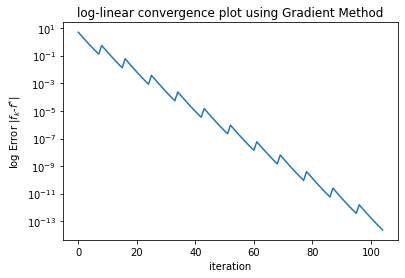

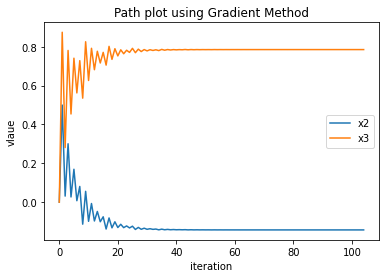

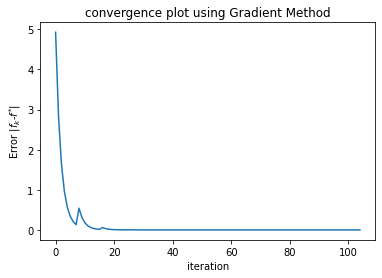

In [255]:
x,error_history=results(fun, g, H, np.array([0,0]),"G",1000)

converged
number of iterations: 1 
x1 = -1.071428571428572
x2 = -0.1428571428571428
x3 = 0.7857142857142858


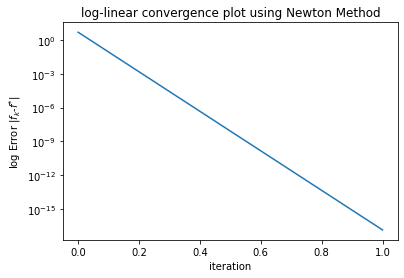

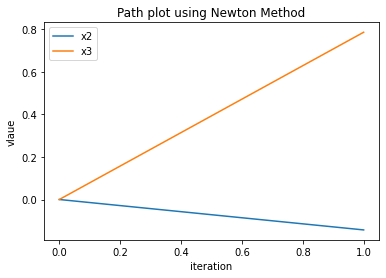

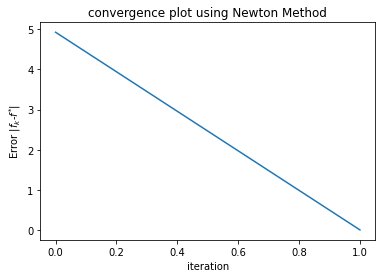

In [256]:
x,error_history2=results(fun, g, H, np.array([0,0]),"N",1000)

In [ ]:
def testcase(fun, g, H,max_iter,method):
  x_res=[]
  iter=[]
  init_val=[]
  for i in range(100):
    x0=4*np.random.rand(2)-2
    init_val.append(x0)
    if method=='G':
      x,error_history,path,iter_=gradient(fun, g, H, x0,max_iter,p=False)
      x_res.append(x)
      iter.append(iter_)
    if method=='N':
      x,error_history,path,iter_=Newton(fun, g, H, x0,max_iter,p=False)
      x_res.append(x)
      iter.append(iter_)   

  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(x_res,linewidth=3)
  ax1.legend(["x1", "x2","x2"],
            bbox_to_anchor = (1.3, 0.9))
  ax2.plot(init_val, 'o',alpha=0.2)
  ax1.set_xlabel('X data')
  ax1.set_ylabel('Converged Value', color='K')
  ax2.set_ylabel('Initial Value', color='K')
  ax1.set_xlabel('Test Numbers')
  ax2.legend(["Initial x2", "Initial x3"],
            bbox_to_anchor = (1.4, 0.6))
  plt.show()
  plt.plot(iter)
  plt.ylabel('Number of Iteration')
  plt.xlabel('Test Number')
  plt.show()
  plt.

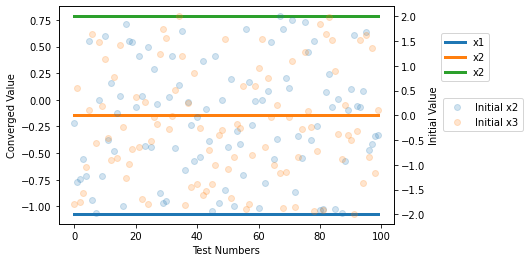

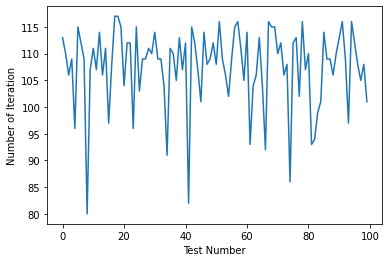

In [ ]:
testcase(fun, g, H,1000,'G')

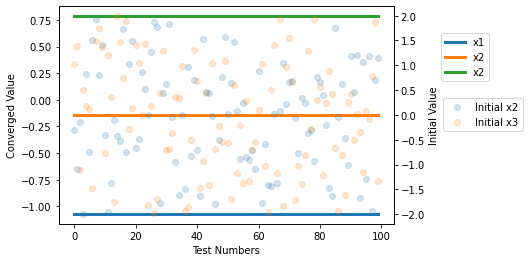

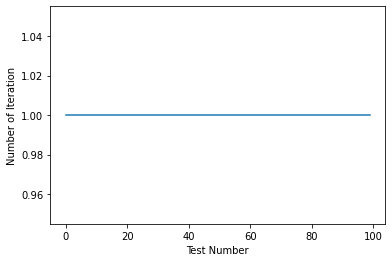

In [ ]:
testcase(fun, g, H,1000,'N')

I tried different random Initial values as a test case and all of the results converge at same point.

Also, I found the newton method took only one step to converge, no matter what the initial point is.

```
Point values
x1 = -1.071428571428572
x2 = -0.1428571428571428
x3 = 0.7857142857142858
```

